In [1]:
using ExcelReaders, JuMP, Gurobi, DataFrames, CPLEX

In [2]:
# Sets
G  = ["Diesel","CCGT","Coal","Hydro"];    # Tecnologias 
P = [i for i=1:670];  # Bloques representativos del año

In [3]:
# Parameters
K = Dict(              # capacida de generador
  "Diesel" => 3000.0,
  "CCGT"   => 4000.0,
  "Coal"   => 10000.0,
  "Hydro"  => 8000.0
);

HR = Dict(              # eficiencia de la planta de energia
  "Diesel" => 11.0,
  "CCGT"   => 8.2,
  "Coal"   => 10.4,
  "Hydro"  => 1
);

CC = Dict(              # costo de combustion
  "Diesel" => 16.36,
  "CCGT"   => 7.32,
  "Coal"   => 2.89,
  "Hydro"  => 0.0
);

MCF = Dict(              # factor de planta anual maximo
  "Diesel" => 1.0,
  "CCGT"   => 1.0,
  "Coal"   => 1.0,
  "Hydro"  => 0.37
);

FOR = Dict(              # tasa de falla del generador
  "Diesel" => 0.0,
  "CCGT"   => 0.0,
  "Coal"   => 0.2,
  "Hydro"  => 0.0
);

D = readxl("DatosdemandaT1.xlsx", "Sheet1!B2:B671"); # demanda en el periodo i

VOLL = 500;

H = 8760/670;

In [4]:
# Modelo declaracion
m = Model(solver=GurobiSolver(Presolve=0)); # Despacho economico
#m = Model(solver=CplexSolver()); # Despacho economico

# Variables
@variable(m, q[G,P] >= 0); # cantidad de energia generada de la tecnologia i en el periodo t
@variable(m, u[P] >= 0); # variable desprendimiento

# funcion objetivo
@objective(m, :Min, sum(CC[i]*q[i,t]*H*HR[i] for i in G, t in P) + sum(VOLL*u[t]*H for t in P));

# Balance demanda energia
@constraint(m, balance[t=P], sum(q[i,t] for i in G) + u[t] == D[t]);

# restriccion de capacidad
@constraint(m, capacidad[i=G,t=P], q[i,t] <= K[i]*(1-FOR[i]));

# restriccion de energia maxima anual
@constraint(m, maximaanual[i=G], sum(H*q[i,t] for t in P) <= MCF[i]*K[i]*sum(H for t in P));

In [5]:
solve(m)

Academic license - for non-commercial use only
Optimize a model with 3354 rows, 3350 columns and 8710 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [4e+02, 7e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+03, 9e+07]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.621056e+07   0.000000e+00      0s
    3613    4.6744667e+09   0.000000e+00   0.000000e+00      0s

Solved in 3613 iterations and 0.17 seconds
Optimal objective  4.674466665e+09


:Optimal

# pregunta 2d

In [12]:
for i=G
  K = Dict(              # capacida de generador
  "Diesel" => 3000.0,
  "CCGT"   => 4000.0,
  "Coal"   => 10000.0,
  "Hydro"  => 8000.0
  );
    
    K[i] = K[i]+1;
    
    # Modelo declaracion
    m2 = Model(solver=GurobiSolver(Presolve=0)); # Despacho economico
    
    # Variables
    @variable(m2, q2[G,P] >= 0); # cantidad de energia generada de la tecnologia i en el periodo t
    @variable(m2, u2[P] >= 0); # variable desprendimiento

    # funcion objetivo
    @objective(m2, :Min, sum(CC[i]*q2[i,t]*H*HR[i] for i in G, t in P) + sum(VOLL*u2[t]*H for t in P));

    # Balance demanda energia
    @constraint(m2, balance2[t=P], sum(q2[i,t] for i in G) + u2[t] == D[t]);

    # restriccion de capacidad
    @constraint(m2, capacidad2[i=G,t=P], q2[i,t] <= K[i]*(1-FOR[i]));

    # restriccion de energia maxima anual
    @constraint(m2, maximaanual2[i=G], sum(H*q2[i,t] for t in P) <= MCF[i]*K[i]*sum(H for t in P));
    
    solve(m2)
    
    println("\n Diferencia usando $(i): $(getobjectivevalue(m2) - getobjectivevalue(m))\n")
end

Academic license - for non-commercial use only
Optimize a model with 3354 rows, 3350 columns and 8710 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [4e+02, 7e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+03, 9e+07]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.621056e+07   0.000000e+00      0s
    3613    4.6744667e+09   0.000000e+00   0.000000e+00      0s

Solved in 3613 iterations and 0.16 seconds
Optimal objective  4.674466665e+09

 Diferencia usando Diesel: 0.0

Academic license - for non-commercial use only
Optimize a model with 3354 rows, 3350 columns and 8710 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [4e+02, 7e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+03, 9e+07]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.621056e+07   0.000000e+00      0s
    3618    4.6734819e+09 

# pregunta 2b

In [15]:
Total_energia = [sum(H*getvalue(q[i,t]) for t in P) for i in G]

for i in Total_energia
    println(@sprintf "    %09.3f" i)
end

println()
Factor_anual = [MCF[i]*K[i]*8760 for i in G]

for i in Factor_anual
    println(@sprintf "    %09.3f" i)
end

pt = getdual(balance)

println()
utilidad = [sum(H*getvalue(q[i,t])*(pt[t]-CC[i]*HR[i]) for t in P) for i in G]

for i in utilidad
    println(@sprintf "    %09.3f" i)
end

    2725970.913
    34612429.347
    70080000.000
    25929600.000

    26280000.000
    35040000.000
    87600000.000
    25932841.200

    5923398087.818
    76588400256.281
    155896736495.518
    61010011265.911


# pregunta 2c

In [16]:
p = sum(H*D[t]*pt[t] for t in P)/sum(H*D[t] for t in P)

2280.4467421862646

# pregunta 2e

In [17]:
getdual(maximaanual)

__anon__: 1 dimensions:
[Diesel] = 0.0
[  CCGT] = 0.0
[  Coal] = 0.0
[ Hydro] = -179.95999999999998

# pregunta 3

In [20]:
 K = Dict(              # capacida de generador
  "Diesel" => 3000.0,
  "CCGT"   => 4000.0,
  "Coal"   => 10000.0,
  "Hydro"  => 8000.0
  );

obj = []
beneficio = []

for i=0:0.01:1

MCF["CCGT"] = i
    
# Modelo declaracion
m1 = Model(solver=GurobiSolver(OutputFlag=0)); # Despacho economico
#m = Model(solver=CplexSolver()); # Despacho economico

# Variables
@variable(m1, q1[G,P] >= 0); # cantidad de energia generada de la tecnologia i en el periodo t
@variable(m1, u1[P] >= 0); # variable desprendimiento

# funcion objetivo
@objective(m1, :Min, sum(CC[i]*q1[i,t]*H*HR[i] for i in G, t in P) + sum(VOLL*u1[t]*H for t in P));

# Balance demanda energia
@constraint(m1, balance1[t=P], sum(q1[i,t] for i in G) + u1[t] == D[t]);

# restriccion de capacidad
@constraint(m1, capacidad1[i=G,t=P], q1[i,t] <= K[i]*(1-FOR[i]));

# restriccion de energia maxima anual
@constraint(m1, maximaanual1[i=G], sum(H*q1[i,t] for t in P) <= MCF[i]*K[i]*sum(H for t in P));

solve(m1)
    
push!(obj,getobjectivevalue(m1))

p = getdual(balance1)

bn = [sum(H*getvalue(q1[i,t])*(p[t]-CC[i]*HR[i]) for t in P) for i in G]
    
push!(beneficio, bn[4]+bn[2])

end

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

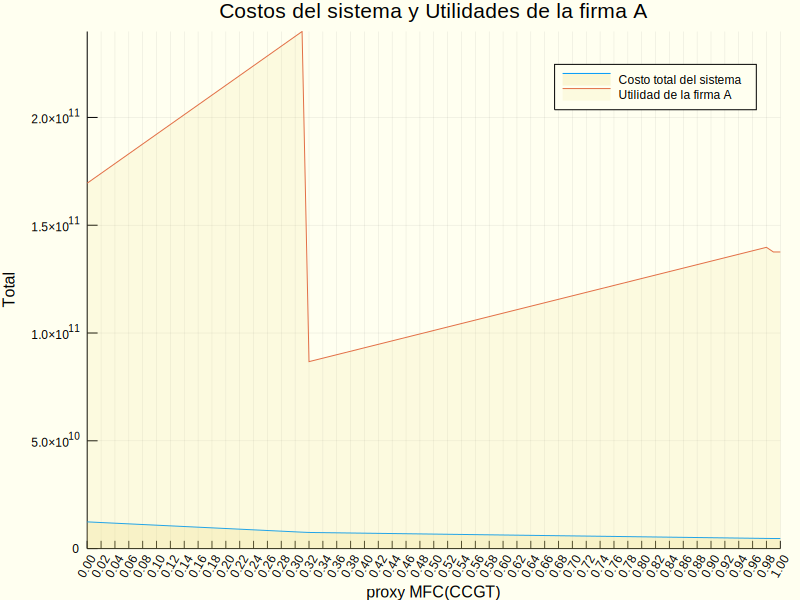

In [21]:
using Plots

xx = 0:0.01:1

pn = plot(xx,obj,                                        
                                                      
    label  = "Costo total del sistema",     
    #line=(:black, 0.5, 6, :solid),                
                                                  
    size=(800, 600),                              
                               
    xlims = (0,1),
    xticks = 0:0.02:1,
    #yticks = -20:2.5:20,                          
                                                  
    ylabel = "Total", 
    xlabel = "proxy MFC(CCGT)",                       
                                                  
    title  = "Costos del sistema y Utilidades de la firma A",              
    xrotation = rad2deg(pi/3),                    
                                                  
    fillrange = 0,                                
    fillalpha = 0.25,                             
    fillcolor = :lightgoldenrod,                  
                                                  
    background_color = :ivory                     
    )

plot!(xx,beneficio,

    label = "Utilidad de la firma A", 
    
    xrotation = rad2deg(pi/3),                    
                                                  
    fillrange = 0,                                
    fillalpha = 0.15,                             
    fillcolor = :lightgoldenrod,                  
                                                  
    background_color = :ivory
)

In [60]:
png(pn, "plots")